In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml
from sklearn import svm

import tensorflow as tf
from tensorflow.keras import layers, models

import pickle
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

In [18]:
#Loading the dataset MNIST
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
print(mnist.DESCR)

/Users/Bella/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [19]:
X = mnist['data']
y = mnist['target'].astype(np.uint8)

In [98]:
!pip install tensorflow
!pip install --upgrade tensorflow

In [20]:
#Reshaping and adjust pixels
X = X.reshape(-1, 28, 28, 1) / 255.0
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [109]:
#Creating the function for CNN
def cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = cnn_model()

/Users/Bella/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
#Training with CNN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
with open('training_history.pkl', 'wb') as f:
    pickle.dump(training.history, f)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.8819 - loss: 0.3641 - val_accuracy: 0.9814 - val_loss: 0.0573
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9840 - loss: 0.0523 - val_accuracy: 0.9884 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9905 - loss: 0.0306 - val_accuracy: 0.9895 - val_loss: 0.0310
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9908 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9870 - val_loss: 0.0384


In [24]:
#Checking that the saving worked
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)
    
print(history)

{'accuracy': [0.9521166682243347, 0.9847999811172485, 0.9896000027656555, 0.9919000267982483, 0.9937000274658203], 'loss': [0.1517917364835739, 0.04824896901845932, 0.03407232463359833, 0.026167970150709152, 0.02058206871151924], 'val_accuracy': [0.9814000129699707, 0.9883999824523926, 0.9894999861717224, 0.9908000230789185, 0.9869999885559082], 'val_loss': [0.057299353182315826, 0.03504856675863266, 0.030993575230240822, 0.03162856772542, 0.0383826307952404]}


In [25]:
#Evaluation of first training with CNN
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9858 - loss: 0.0403
Test Loss: 0.0383826307952404
Test Accuracy: 0.9869999885559082


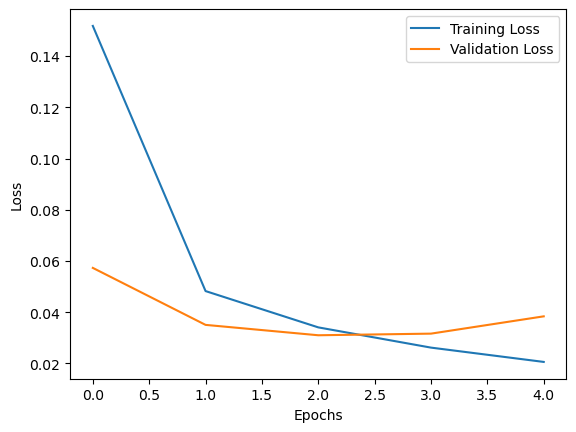

In [26]:
#Plot of first try with CNN
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

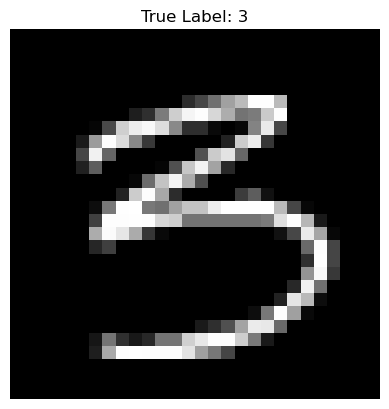

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Label: 9


In [70]:
#Image prediction with CNN
image_index = 100
image = X_test[image_index]
true_label = y_test[image_index]

image = image.reshape(28, 28)
image = image / 255.0

plt.imshow(image, cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

predicted_label = np.argmax(model.predict(np.expand_dims(image, axis=0)))

print(f"Predicted Label: {predicted_label}")

In [35]:
#Adding Image data generator
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(X_train)

In [36]:
#Adding Learning rate scheduler
def lr_schedule(epoch):
    return 0.0001 * np.exp(-epoch / 10)
lr_scheduler = LearningRateScheduler(lr_schedule)

In [37]:
#Adding Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [38]:
#Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
#Second try with modifications
training2 = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

with open('training2_history.pkl', 'wb') as f:
    pickle.dump(training2.history, f)

Epoch 1/5
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:16:11 2s/step - accuracy: 0.8438 - loss: 0.9823

/Users/Bella/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7539 - loss: 1.3081 - val_accuracy: 0.9915 - val_loss: 0.0623 - learning_rate: 1.0000e-04
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.7735 - loss: 0.8517 - val_accuracy: 0.9910 - val_loss: 0.0691 - learning_rate: 9.0484e-05
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 128s 38ms/step - accuracy: 0.7802 - loss: 0.7627 - val_accuracy: 0.9902 - val_loss: 0.0722 - learning_rate: 8.1873e-05
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7814 - loss: 0.7308 - val_accuracy: 0.9914 - val_loss: 0.0651 - learning_rate: 7.4082e-05


In [40]:
#Evaluation of second try with CNN
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9916 - loss: 0.0635
Test Loss: 0.062297504395246506
Test Accuracy: 0.9915000200271606


In [106]:
#Classification report of CNN
y_pred_cnn = np.argmax(model.predict(X_test), axis=1)
report_cnn = classification_report(y_test, y_pred_cnn, zero_division=1)


print("CNN Model Classification Report:")
print(report_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.02      0.01      0.01       983
           1       0.04      0.02      0.03      1152
           2       0.00      0.00      1.00       967
           3       1.00      0.00      0.00      1034
           4       0.08      0.08      0.08       906
           5       1.00      0.00      0.00       937
           6       0.00      0.00      1.00       961
           7       0.13      0.95      0.23      1055
           8       1.00      0.00      0.00       969
           9       0.00      0.00      0.00      1036

    accuracy                           0.11     10000
   macro avg       0.33      0.11      0.24     10000
weighted avg       0.32      0.11      0.23     10000



In [41]:
#Confusion matrix for second attempt with CNN
y_probabilities = model.predict(X_test)
y_pred = np.argmax(y_probabilities, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Confusion Matrix:
 [[ 979    0    0    0    0    0    1    1    2    0]
 [   0 1149    1    1    0    0    0    1    0    0]
 [   0    0  962    0    2    0    0    0    3    0]
 [   0    0    6 1024    0    2    0    0    1    1]
 [   0    0    1    0  897    0    2    0    0    6]
 [   0    0    0    4    0  927    2    0    4    0]
 [   0    0    1    0    1    1  956    0    2    0]
 [   0    0    3    1    3    0    0 1045    0    3]
 [   0    0    3    2    1    4    2    1  953    3]
 [   3    0    0    0    1    2    0    2    5 1023]]


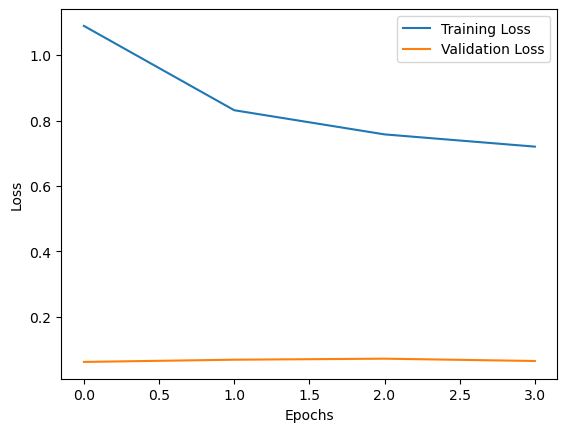

In [47]:
#PLot for second train & test with CNN
plt.plot(training2.history['loss'], label='Training Loss')
plt.plot(training2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
#Reshaping for SVM
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [63]:
#Creating the SVM and evaluate
svm_classifier = svm.SVC()

svm_classifier.fit(X_train_flattened, y_train)

accuracy = svm_classifier.score(X_test_flattened, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9773


In [111]:
#Confusion matrix for SVM
y_pred2 = svm_classifier.predict(X_test_flattened)
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 974    0    3    0    1    0    1    1    3    0]
 [   0 1139    4    4    0    0    0    3    1    1]
 [   1    2  951    1    2    1    2    3    4    0]
 [   0    2    8 1001    1    7    1    6    4    4]
 [   1    0    1    0  887    0    3    2    2   10]
 [   0    0    2   10    0  914    7    1    3    0]
 [   1    0    0    0    3    3  951    0    3    0]
 [   0    4    9    0    4    0    0 1030    0    8]
 [   1    4    7   10    2    3    5    5  928    4]
 [   5    6    1    6    8    1    0    6    5  998]]


In [112]:
#Classification report of SVM
report = classification_report(y_test, y_pred2)
print("SVM Classification Report:")
print(report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.98      0.99      0.99      1152
           2       0.96      0.98      0.97       967
           3       0.97      0.97      0.97      1034
           4       0.98      0.98      0.98       906
           5       0.98      0.98      0.98       937
           6       0.98      0.99      0.98       961
           7       0.97      0.98      0.98      1055
           8       0.97      0.96      0.97       969
           9       0.97      0.96      0.97      1036

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



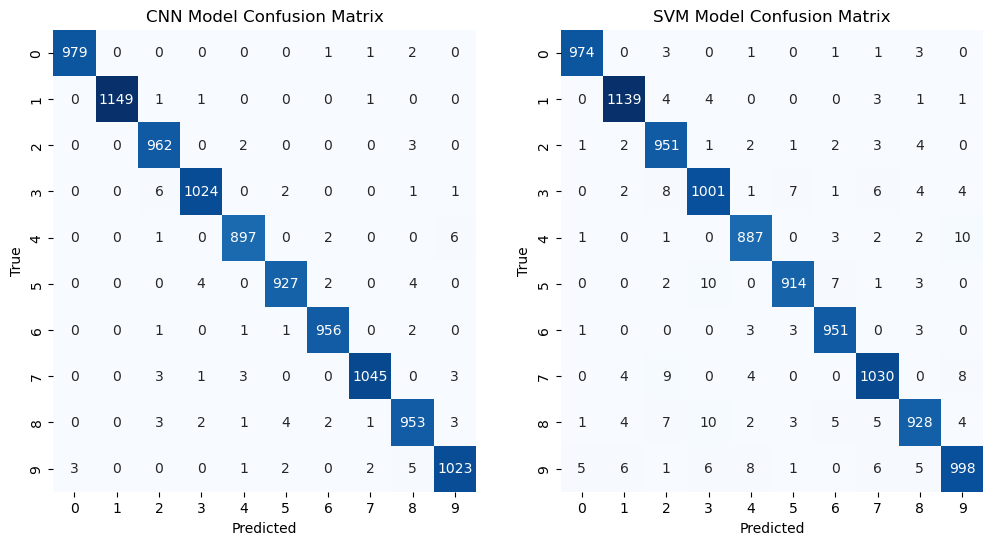

In [72]:
#Confusion Matrix for CNN & SVM with color
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('CNN Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('SVM Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

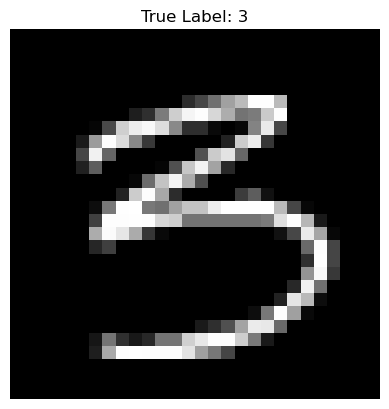

Predicted Label: 3


In [107]:
# SVM predicting image 100
image_index = 100

image = X_test[image_index].reshape(28, 28)
true_label = y_test[image_index]

plt.imshow(image, cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

image_flattened = X_test_flattened[image_index].reshape(1, -1)

predicted_label = svm_classifier.predict(image_flattened)[0]

print(f"Predicted Label: {predicted_label}")